In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [75]:
df_melt = pd.read_excel('D:\Data\Data Engineering_ITI\Data Exploration and preparation\day_3\lab-20231012T192036Z-001\lab\population_total.xlsx')

In [ ]:
df_melt

In [76]:
df_melt = df_melt.melt(id_vars=['country'], var_name='Year', value_name='total_Population')

In [77]:
df_melt

,country,Year,total_Population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


In [ ]:
df_melt.dt

In [78]:
df_melt['total_Population'].astype(str).apply(lambda x:x[-1]).unique()

array(['M', 'k', '0', '5', '6', '7', '8', '9', '1', '2', '3', '4', 'B'],
      dtype=object)

In [81]:
def to_number(input_):
    last = input_[-1]
    if last is int:
        return input_
    elif last == 'M':
        input_ = float(input_[:-1])*10**6
        return input_
    elif last == 'k':
        input_ = float(input_[:-1])*10**3
        return input_
    elif last == 'B':
        input_ = float(input_[:-1])*10**9  
        return input_
    else:
        return input_

In [82]:
to_number('2650')

'2650'

In [85]:
df_melt['total_Population'] = df_melt['total_Population'].astype(str).apply(lambda x:to_number(x)).astype(float)

In [87]:
df_melt

,country,Year,total_Population
0,Afghanistan,1800,3280000.0
1,Angola,1800,1570000.0
2,Albania,1800,400000.0
3,Andorra,1800,2650.0
4,United Arab Emirates,1800,40200.0
...,...,...,...
59292,Samoa,2100,310000.0
59293,Yemen,2100,53200000.0
59294,South Africa,2100,79200000.0
59295,Zambia,2100,81500000.0


<AxesSubplot:xlabel='Year', ylabel='total_Population'>

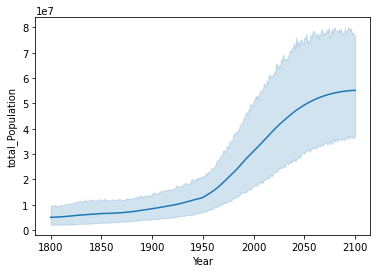

In [96]:
sns.lineplot(data =df_melt ,x='Year', y = 'total_Population')